In [2]:
import numpy as np
import pandas as pd

In [11]:
dataset = pd.read_csv('sexism_data.csv')

In [12]:
dataset.shape

(14881, 2)

In [13]:
dataset.head()

,Text,Annotation
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism
1,There's some very hate able teams this year #MKR,none
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",none
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism


### Convert to 0 and 1

In [14]:
def convert(x):
    if x.strip() == 'sexism':
        return 1
    else:
        return 0

In [15]:
dataset['Annotation'].value_counts()

Annotation
none      11501
sexism     3377
Name: count, dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14881 entries, 0 to 14880
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        14880 non-null  object
 1   Annotation  14878 non-null  object
dtypes: object(2)
memory usage: 232.6+ KB


In [17]:
data = dataset.dropna()

In [18]:
data['Annotation'] = data['Annotation'].apply(lambda x: convert(x))

C:\Users\User\AppData\Local\Temp\ipykernel_4520\2568831095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annotation'] = data['Annotation'].apply(lambda x: convert(x))


In [19]:
data.head()

,Text,Annotation
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1
1,There's some very hate able teams this year #MKR,0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14878 entries, 0 to 14880
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        14878 non-null  object
 1   Annotation  14878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 348.7+ KB


In [21]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
corpus=[]

for text in data['Text']:
  review = re.sub('[^a-zA-Z]', ' ', text)
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [25]:
corpus

['rt beepss senna beepss not sexist fuck woman cook get shit togeth',
 'hate abl team year mkr',
 'rt eccl everyon underestim us still well underestim judg mkr',
 'rt notlukedarci channel mkr actual check peopl could cook witb',
 'shut jeff thought realli funni joke promis not sexist say',
 'rt wateronatrain mt might like http co c pfmfj patriarchi',
 'rt kholli bet camper vote strateg least kat say mkr',
 'evvykub absurd much amazon wish list consist sock',
 'rt daniellevle colin obvious malnourish cook caus sound deliri mkr',
 'newscoverup rjennromao gbabeuf davidjo novorossiyan gbazov rougek russia armi internet troll http co cg aijthq',
 'rt metalbarbiedol yea appar gamerg women sock puppet lol http co woudli',
 'sam notic see kat andr cut away mkr yay',
 'rt g yu piercecotwa twitter u care abt presumpt innoc instapundit avfmnew mt asheschow scottgreenfield',
 'nkraus dude go culinari school findawif notsexist',
 'ingyusarm blind hatr would feel buddhism hinduism tao etc blind stup

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [27]:
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [28]:
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Naive Bayes

[[ 748 1558]
 [  26  644]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.32      0.49      2306
           1       0.29      0.96      0.45       670

    accuracy                           0.47      2976
   macro avg       0.63      0.64      0.47      2976
weighted avg       0.81      0.47      0.48      2976



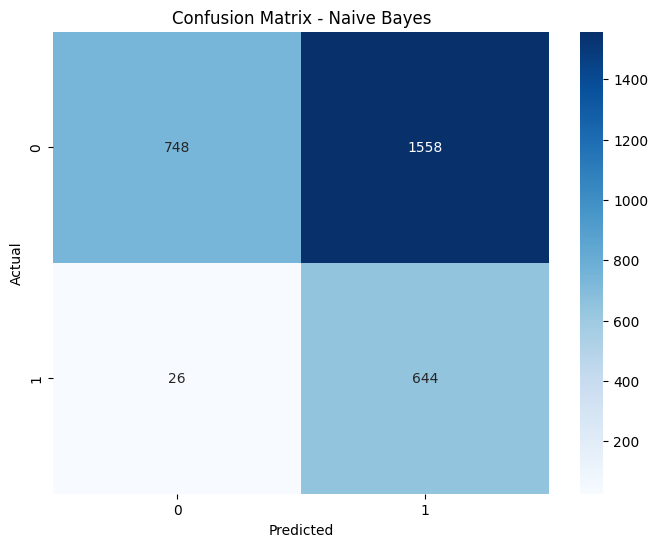

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


# Classification report (Naive Bayes)
classification_rep_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

# Get the predicted labels
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## SVM

SVM Confusion Matrix:
[[2198  108]
 [ 239  431]]
SVM Accuracy: 0.8834005376344086
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2306
           1       0.80      0.64      0.71       670

    accuracy                           0.88      2976
   macro avg       0.85      0.80      0.82      2976
weighted avg       0.88      0.88      0.88      2976



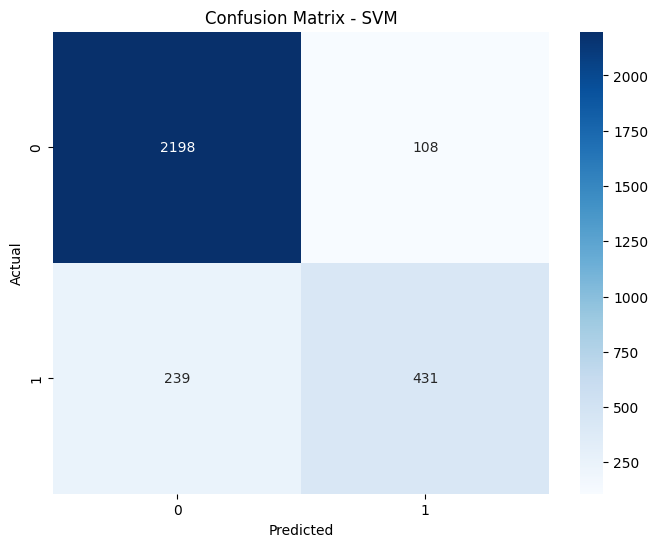

In [31]:
### Model fitting (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report



classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

# Exporting SVM Classifier to later use in prediction
joblib.dump(classifier_svm, 'c3_SVM_Sentiment_Model')

### Model performance (SVM)
y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report (SVM)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_rep_svm)


# Get the predicted labels
y_pred_svm = classifier_svm.predict(X_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_svm)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


## Random Forest

Random Forest Confusion Matrix:
[[2190  116]
 [ 227  443]]
Random Forest Accuracy: 0.884744623655914
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2306
           1       0.79      0.66      0.72       670

    accuracy                           0.88      2976
   macro avg       0.85      0.81      0.82      2976
weighted avg       0.88      0.88      0.88      2976



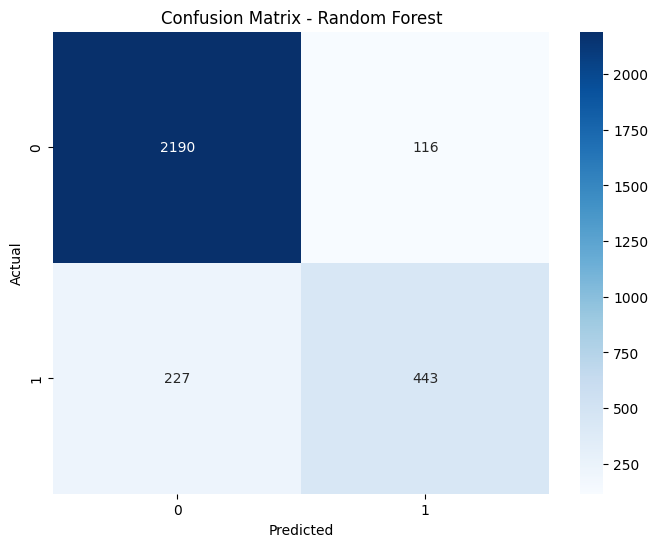

In [32]:
### Model fitting (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

# Exporting Random Forest Classifier to later use in prediction
joblib.dump(classifier_rf, 'c3_RF_Sentiment_Model')

### Model performance (Random Forest)
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)


# Get the predicted labels
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_rf)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## Gradient Boosting

Gradient Boosting Confusion Matrix:
[[2268   38]
 [ 337  333]]
Gradient Boosting Accuracy: 0.873991935483871
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2306
           1       0.90      0.50      0.64       670

    accuracy                           0.87      2976
   macro avg       0.88      0.74      0.78      2976
weighted avg       0.88      0.87      0.86      2976



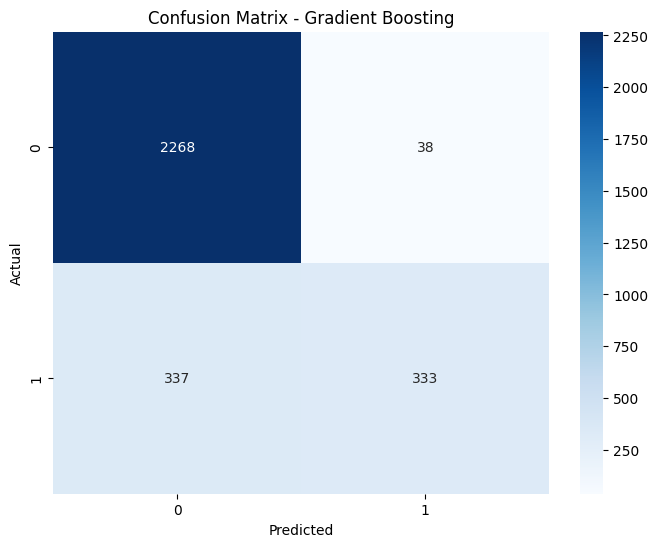

In [33]:
### Model fitting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_gb.fit(X_train, y_train)

# Exporting Gradient Boosting Classifier to later use in prediction
joblib.dump(classifier_gb, 'c4_GB_Sentiment_Model')

### Model performance (Gradient Boosting)
y_pred_gb = classifier_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report (Gradient Boosting)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)



# Get the predicted labels
y_pred_gb = classifier_gb.predict(X_test)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_gb)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## Logistic Regression

Logistic Regression Confusion Matrix:
[[2222   84]
 [ 250  420]]
Logistic Regression Accuracy: 0.8877688172043011
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2306
           1       0.83      0.63      0.72       670

    accuracy                           0.89      2976
   macro avg       0.87      0.80      0.82      2976
weighted avg       0.88      0.89      0.88      2976



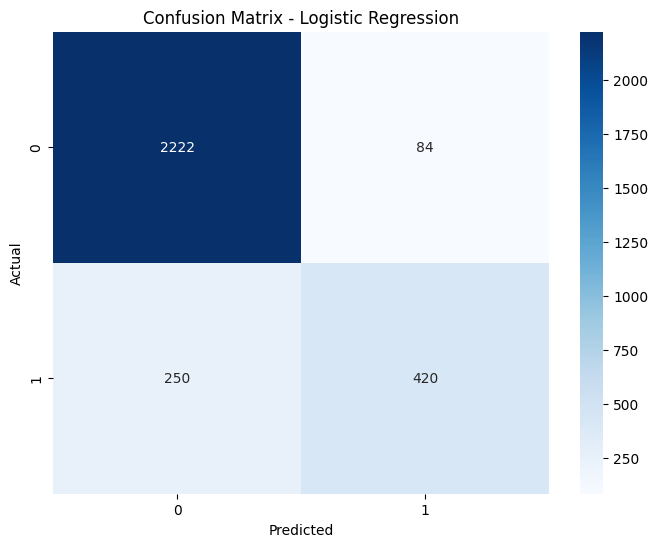

In [34]:
### Model fitting (Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# Exporting Logistic Regression Classifier to later use in prediction
joblib.dump(classifier_lr, 'c5_LR_Sentiment_Model')

### Model performance (Logistic Regression)
y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Classification report (Logistic Regression)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_rep_lr)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted labels
y_pred_lr = classifier_lr.predict(X_test)

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

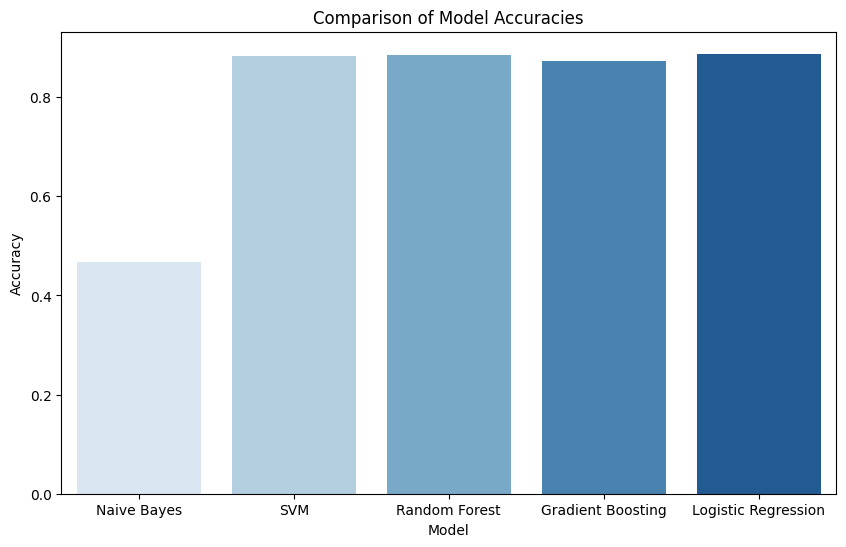

In [35]:
# Create a list of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_svm, accuracy_rf, accuracy_gb, accuracy_lr]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()
